#**Coronary heart disease predictor using Machine Learning**


#Workflow of model
**1.Data collection**
  **2.Train-Test split**
  **3.Model Training**
  **4.Model Evaluation**
   **5.Predicting Results**

#Importing Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Reading Dataset

In [154]:
hd = pd.read_csv('/content/heart_disease_uci.csv')
hd.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [155]:
hd.shape

(920, 16)

In [156]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Droping Column 'dataset' as it is not required for visualization.**

In [157]:
hd = hd.drop(['id','dataset','ca'],axis=1)

#Renaming Columns
**Renaming some columns for our better understanding.**

In [158]:
hd.rename(columns = {'cp':'Chest_Pain_Type', 'trestbps':'Resting_Blood_Pressure','chol':'serum_cholesterol','fbs':'Fasting_Blood_Sugar','restecg':'Resting_Electrocardiographic','thalch':'Maximum_Heart_Rate','exang':'Exercise_Induced_Angina','oldpeak':'ST_Depression_Induced','thal':'Heart_Condition'}, inplace = True)

In [159]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           920 non-null    int64  
 1   sex                           920 non-null    object 
 2   Chest_Pain_Type               920 non-null    object 
 3   Resting_Blood_Pressure        861 non-null    float64
 4   serum_cholesterol             890 non-null    float64
 5   Fasting_Blood_Sugar           830 non-null    object 
 6   Resting_Electrocardiographic  918 non-null    object 
 7   Maximum_Heart_Rate            865 non-null    float64
 8   Exercise_Induced_Angina       865 non-null    object 
 9   ST_Depression_Induced         858 non-null    float64
 10  slope                         611 non-null    object 
 11  Heart_Condition               434 non-null    object 
 12  num                           920 non-null    int64  
dtypes: fl

<Axes: >

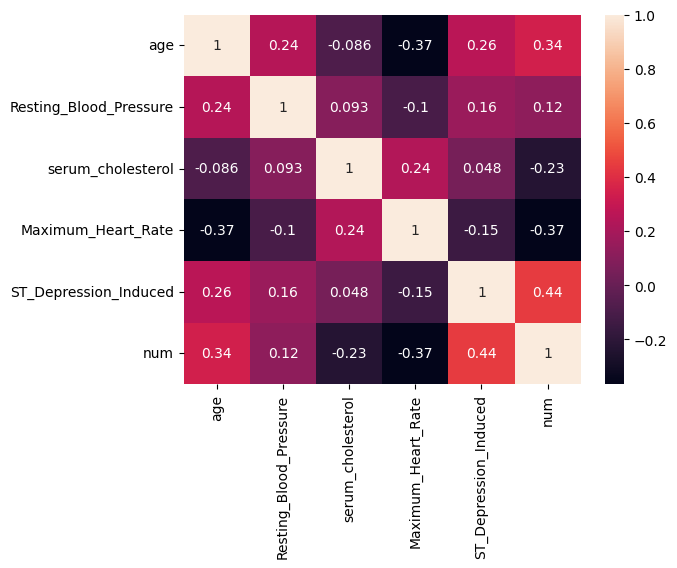

In [160]:
sns.heatmap(hd.corr(),annot=True)

#Cleaning Dataset
**Now we need to remove Null values from the Dataset.**

Columns 'Resting_Blood_Pressure','serum_cholesterol','Fasting_Blood_Sugar','Resting_Electrocardiographic','Maximum_Heart_Rate','Exercise_Induced_Angina','ST_Depression_Induced','slope','Vessels_Colored' and 'Heart_Condition' has Nan values.

In [161]:
hd['Resting_Blood_Pressure'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

**Column = 'Resting_Blood_Pressure'**

In [162]:
drop_row = hd[hd['Resting_Blood_Pressure']==0].index
hd.drop(drop_row, inplace=True)

In [163]:
hd['Resting_Blood_Pressure'].isnull().value_counts()

False    860
True      59
Name: Resting_Blood_Pressure, dtype: int64

There are 59 Nan values, Now we will fill these by mean of the 'Resting_Blood_Pressure' column by grouping them with age.

In [164]:
mean_value1 = hd.groupby('age')['Resting_Blood_Pressure'].mean()

In [165]:
for i,j in zip(mean_value1.index,mean_value1):
    hd.loc[hd['age']==i,'Resting_Blood_Pressure']= hd.loc[hd['age']==i,'Resting_Blood_Pressure'].fillna(j)

In [166]:
hd['Resting_Blood_Pressure'].isnull().sum()

0

**We have filled the Nan valus with mean of grouping 'Resting_Blood_Pressure' with 'age' column. It is clean now with no Nan values. And we will do similar process for 'serum_cholesterol'.**

**Column = 'serum_cholesterol'**

In [167]:
hd['serum_cholesterol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [168]:
hd['serum_cholesterol'].isnull().sum()

30

**Column = 'Fasting_Bood_Sugar'**

In [169]:
hd['Fasting_Blood_Sugar'].isnull().sum()

90

In [170]:
hd.groupby('Fasting_Blood_Sugar')['sex'].value_counts()

Fasting_Blood_Sugar  sex   
False                Male      527
                     Female    164
True                 Male      119
                     Female     19
Name: sex, dtype: int64

In [171]:
hd['Resting_Electrocardiographic'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [172]:
hd['Maximum_Heart_Rate'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94., 104.,  60.,  83.,  63.,  70.,  77.,
        72.,  78.,  86.,  93.,  67.,  84.,  80., 107.,  69.,  73.])

In [173]:
mean_value3 = hd.groupby('age')['Maximum_Heart_Rate'].mean()

In [174]:
for i,j in zip(mean_value3.index,mean_value3):
    hd.loc[hd['age']==i,'Maximum_Heart_Rate']= hd.loc[hd['age']==i,'Maximum_Heart_Rate'].fillna(j)

In [175]:
hd['Maximum_Heart_Rate'].isnull().sum()

0

In [176]:
hd['Exercise_Induced_Angina'].unique()

array([False, True, nan], dtype=object)

In [177]:
hd['ST_Depression_Induced'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. ,  nan, -1.1, -1.5,
       -0.1, -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [178]:
hd['ST_Depression_Induced'].isnull().sum()

62

In [179]:
mean_value4 = hd.groupby('age')['ST_Depression_Induced'].mean()

In [180]:
for i,j in zip(mean_value4.index,mean_value4):
    hd.loc[hd['age']==i,'ST_Depression_Induced']= hd.loc[hd['age']==i,'ST_Depression_Induced'].fillna(j)

In [181]:
hd['ST_Depression_Induced'].isnull().sum()



0

In [182]:
hd['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [183]:
hd['slope'].isnull().sum()

309

In [ ]:
mode_value = hd.groupby('ST_Depression_Induced')['slope'].agg(pd.Series.mode)
mode_value

ST_Depression_Induced
-2.6                        flat
-2.0                        flat
-1.5                 downsloping
-1.1                   upsloping
-1.0    [downsloping, upsloping]
                  ...           
 4.2         [downsloping, flat]
 4.4                 downsloping
 5.0                        flat
 5.6                 downsloping
 6.2                 downsloping
Name: slope, Length: 76, dtype: object

In [184]:
hd = hd.dropna()
hd.shape

(372, 13)

In [185]:
hd.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,serum_cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression_Induced,slope,Heart_Condition,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


# Data Visualization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Resting_Blood_Pressure'}>],
       [<Axes: title={'center': 'serum_cholesterol'}>,
        <Axes: title={'center': 'Maximum_Heart_Rate'}>],
       [<Axes: title={'center': 'ST_Depression_Induced'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

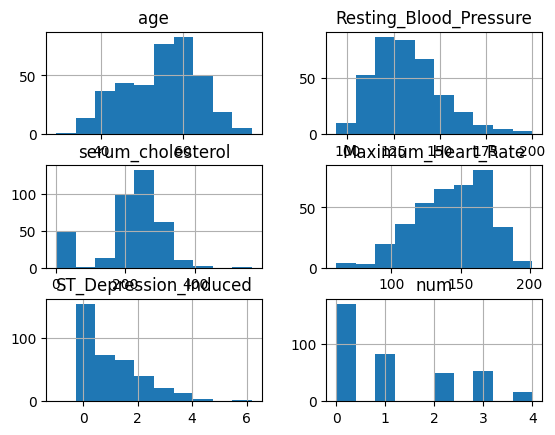

In [186]:
hd.hist()

*Target Column*

Text(0.5, 1.0, 'Target Column')

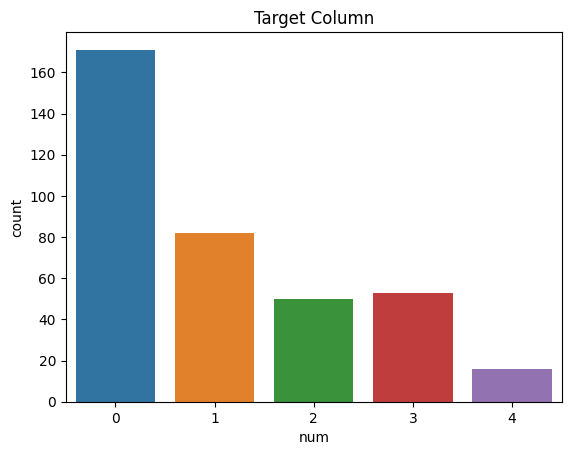

In [187]:
sns.countplot(x='num',data = hd)
plt.title('Target Column')

<Figure size 640x480 with 0 Axes>

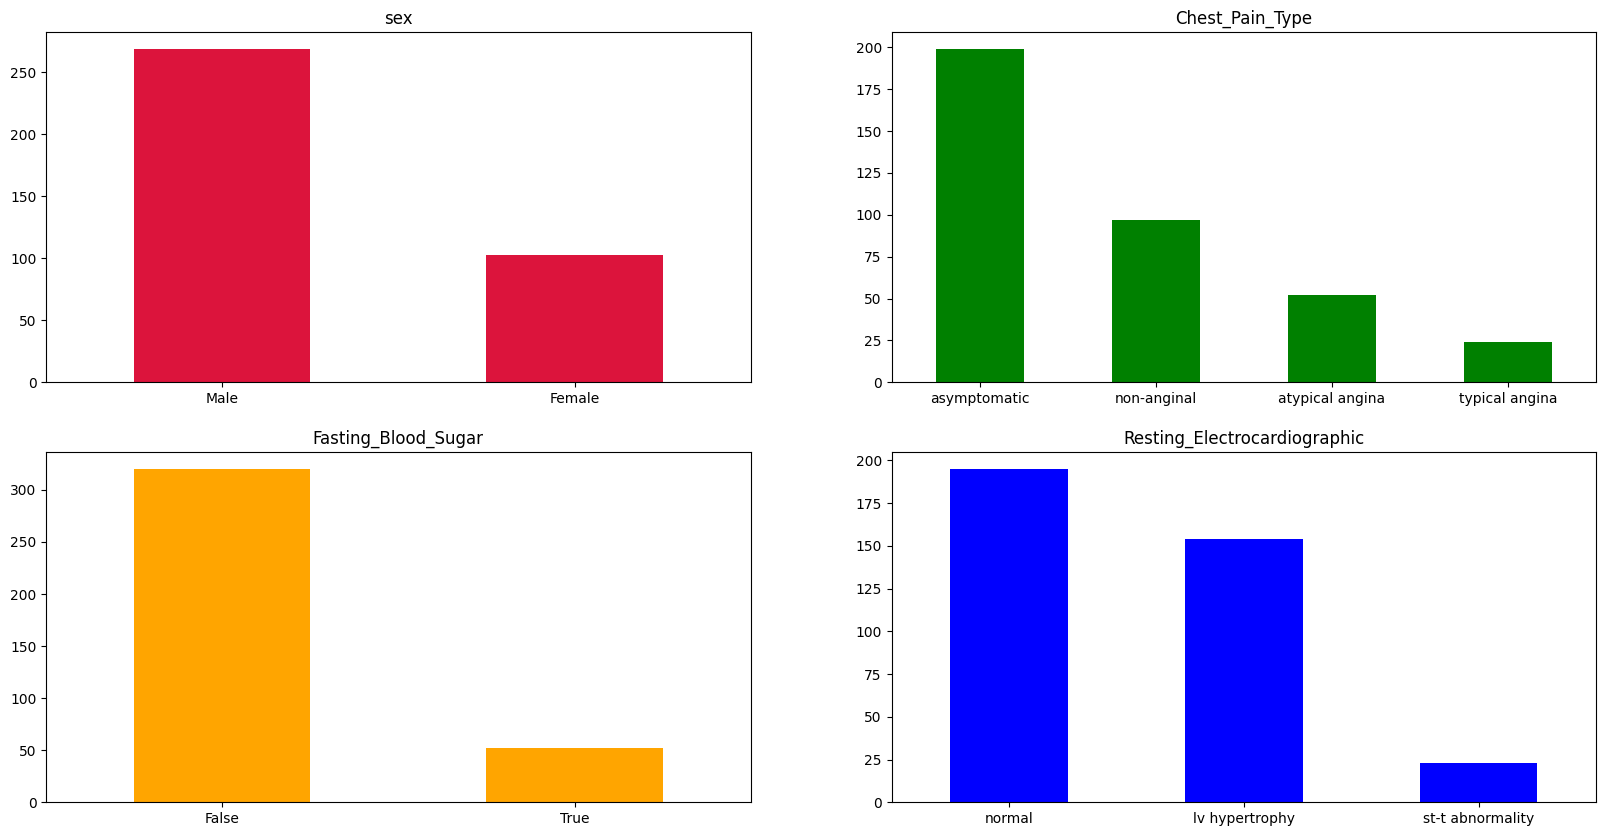

In [188]:
plt.figure(1)
plt.figure(figsize=(20,10))

# Column (sex)
plt.subplot(221)
hd['sex'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('sex')

# Column (Chest_Pain_Type)
plt.subplot(222)
hd['Chest_Pain_Type'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('Chest_Pain_Type')

# Column (Fasting_Blood_Sugar)
plt.subplot(223)
hd['Fasting_Blood_Sugar'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Fasting_Blood_Sugar')

# Column (Resting_Electrocardiographic)
plt.subplot(224)
hd['Resting_Electrocardiographic'].value_counts().plot(kind='bar',color='blue',rot=0)
plt.title('Resting_Electrocardiographic')

plt.show()

<Figure size 640x480 with 0 Axes>

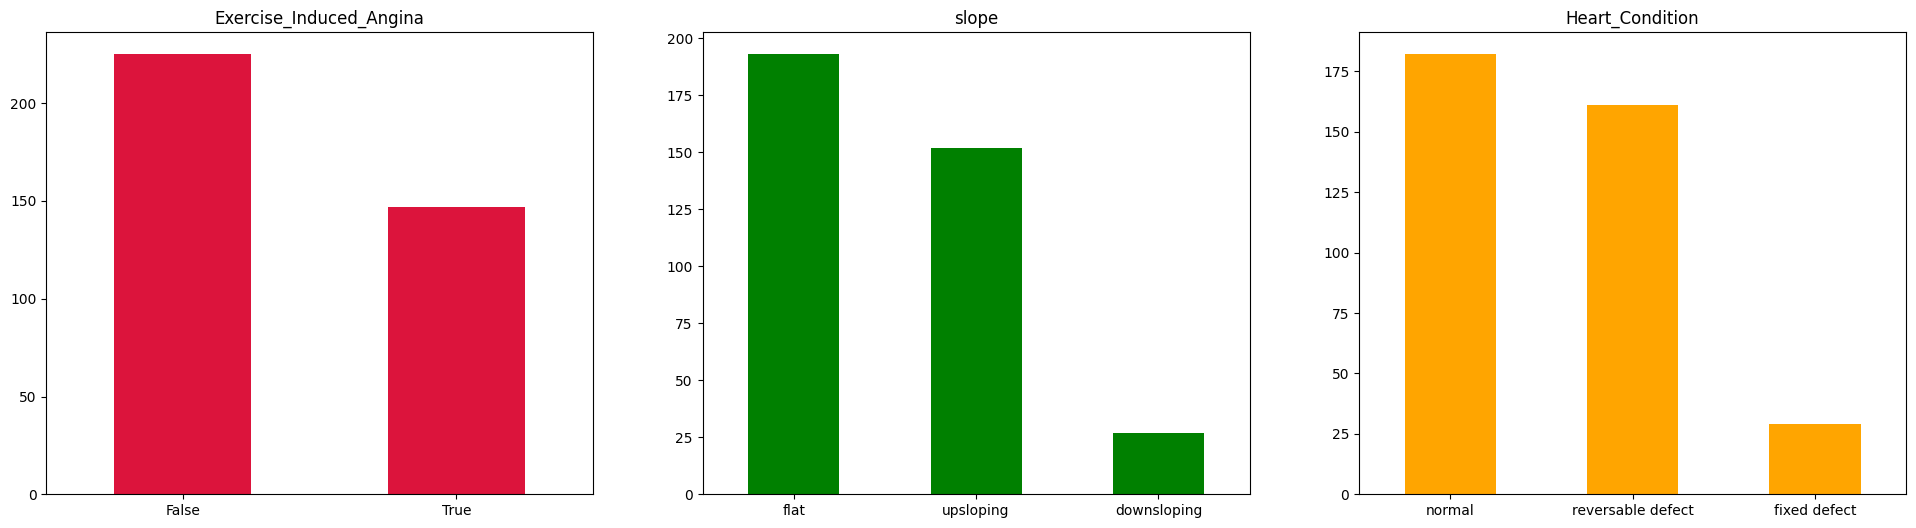

In [189]:
plt.figure(1)
plt.figure(figsize=(24,6))

# Column (Exercise_Induced_Angina)
plt.subplot(131)
hd['Exercise_Induced_Angina'].value_counts().plot(kind='bar',color='crimson',rot=0)
plt.title('Exercise_Induced_Angina')

# Column (slope)
plt.subplot(132)
hd['slope'].value_counts().plot(kind='bar',color='green',rot=0)
plt.title('slope')

# Column (Heart_Condition)
plt.subplot(133)
hd['Heart_Condition'].value_counts().plot(kind='bar',color='orange',rot=0)
plt.title('Heart_Condition')

plt.show()

<Figure size 640x480 with 0 Axes>

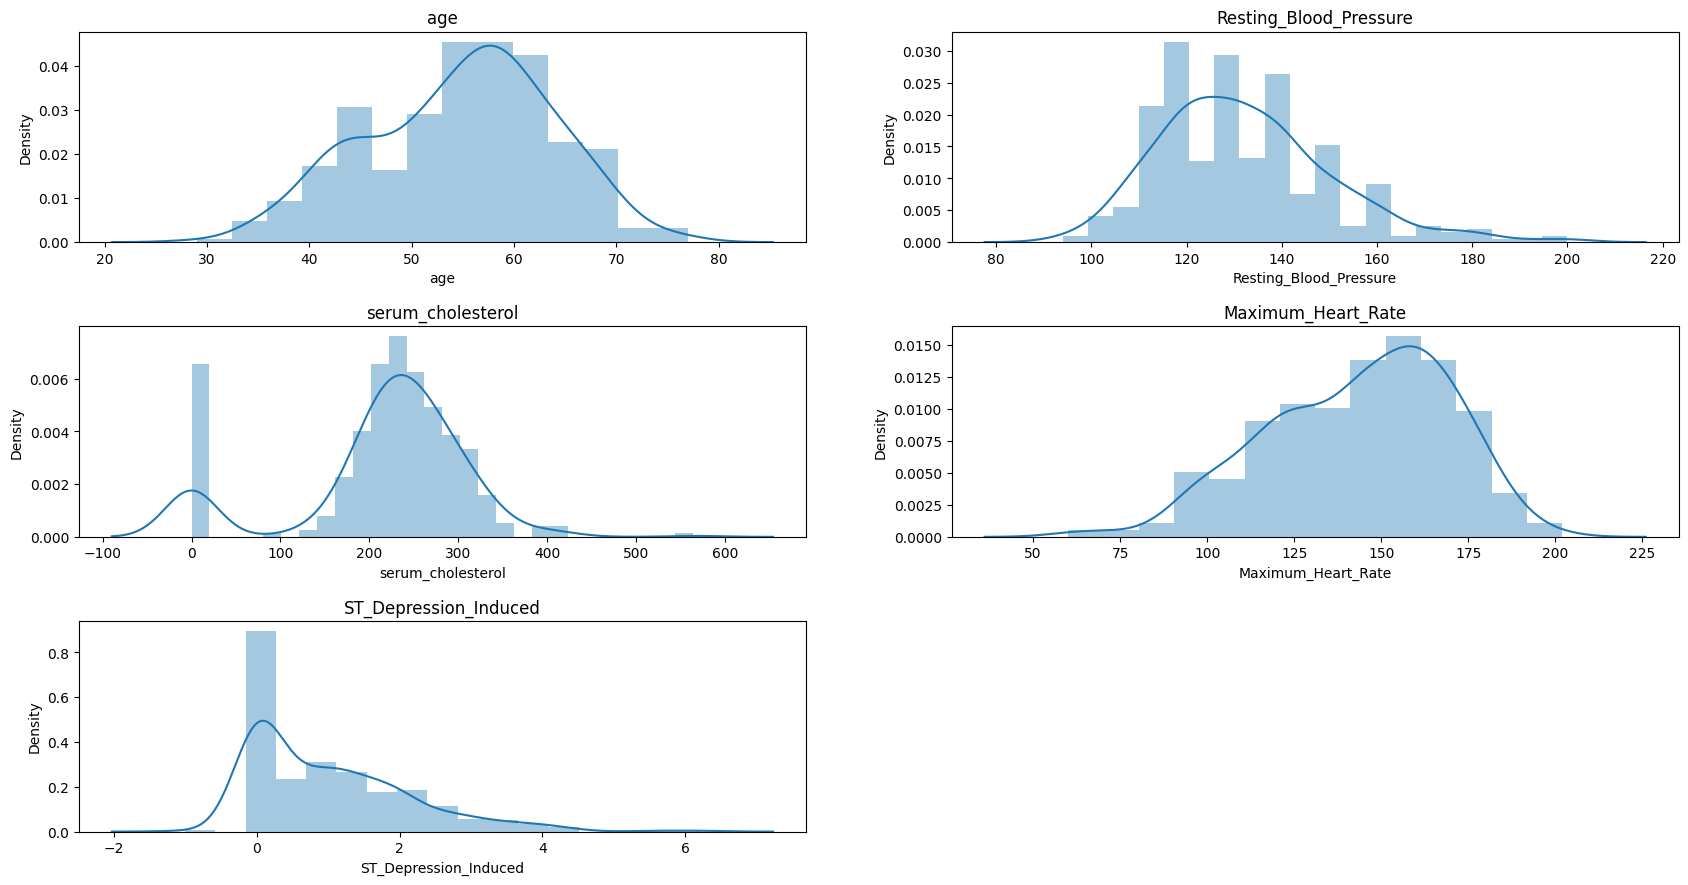

In [190]:
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)

# Column (age)
plt.subplot(321)
sns.distplot(hd['age'])
plt.title('age')

# Column (Resting_Blood_Pressure)
plt.subplot(322)
sns.distplot(hd['Resting_Blood_Pressure'])
plt.title('Resting_Blood_Pressure')

# Column (serum_cholesterol)
plt.subplot(323)
sns.distplot(hd['serum_cholesterol'])
plt.title('serum_cholesterol')

# Column (Maximum_Heart_Rate)
plt.subplot(324)
sns.distplot(hd['Maximum_Heart_Rate'])
plt.title('Maximum_Heart_Rate')

# Column (Maximum_Heart_Rate)
plt.subplot(325)
sns.distplot(hd['ST_Depression_Induced'])
plt.title('ST_Depression_Induced')

plt.show()

<Figure size 640x480 with 0 Axes>

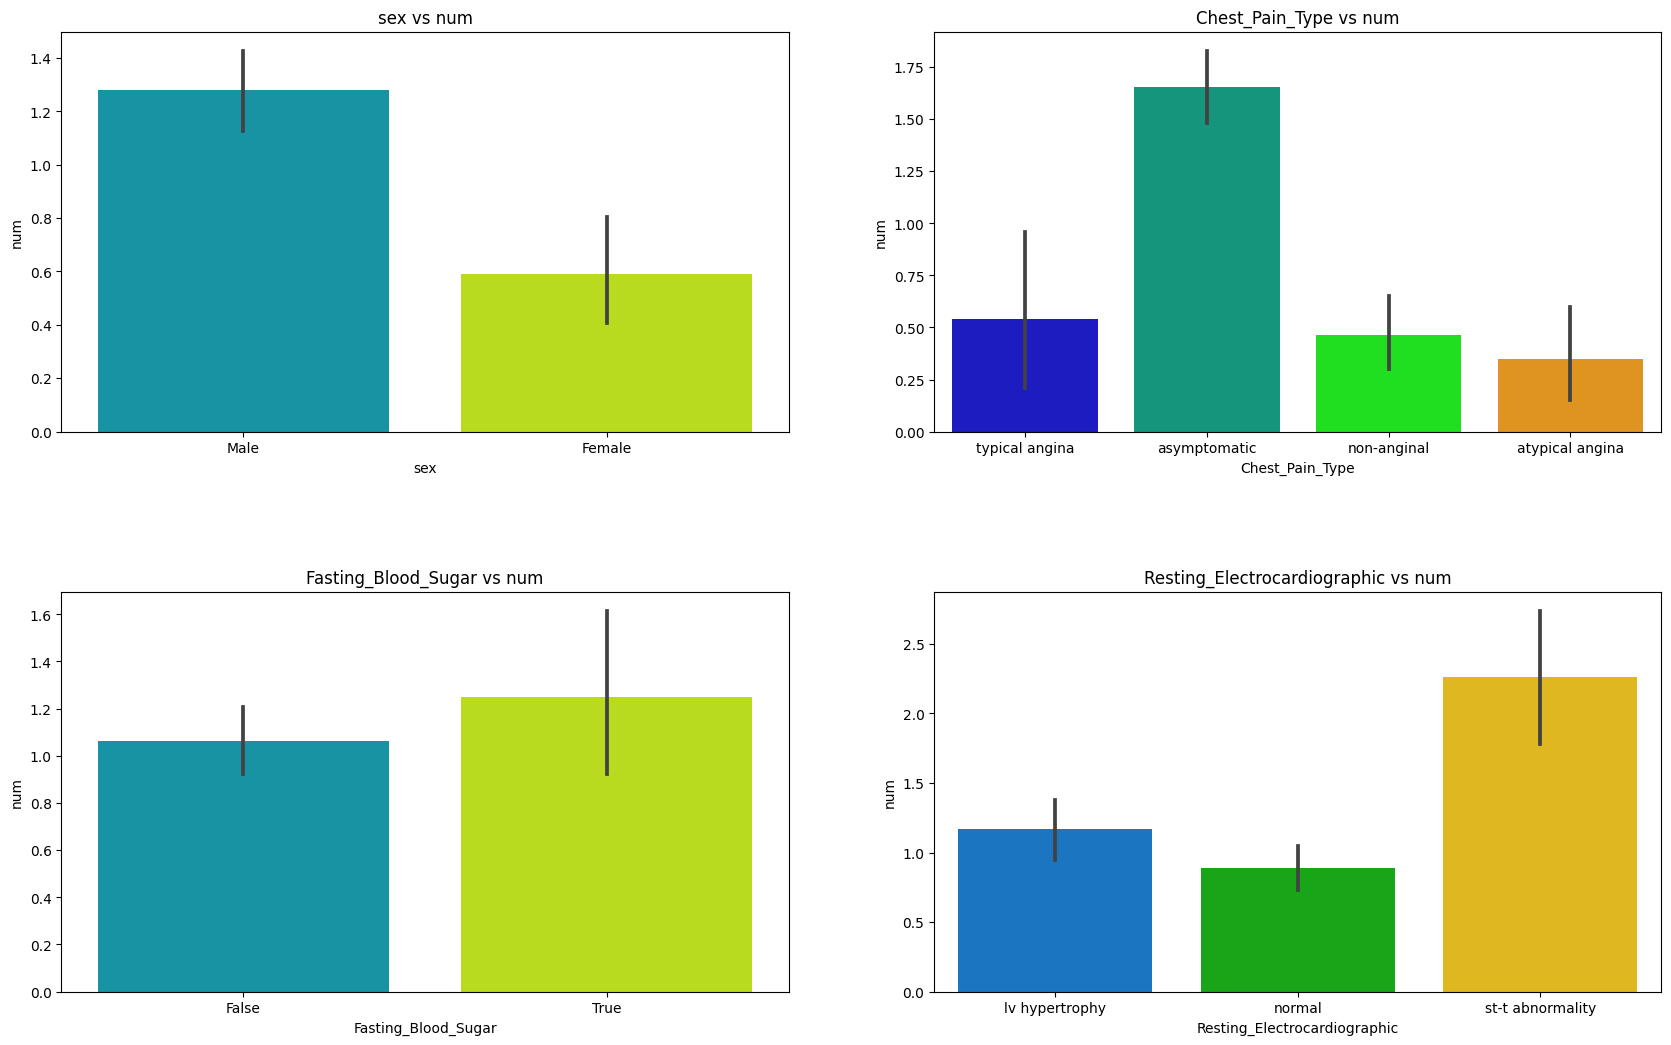

In [191]:
plt.figure(1)
plt.figure(figsize = (20, 12))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)

# Column (num vs sex)
plt.subplot(221)
sns.barplot(x = hd['sex'], y = hd['num'], palette = "nipy_spectral")
plt.title('sex vs num')

# Column (num vs Chest_Pain_Type)
plt.subplot(222)
sns.barplot(x = hd['Chest_Pain_Type'], y = hd['num'], palette = "nipy_spectral")
plt.title('Chest_Pain_Type vs num')

# Column (num vs Fasting_Blood_Sugar)
plt.subplot(223)
sns.barplot(x = hd['Fasting_Blood_Sugar'], y = hd['num'], palette = "nipy_spectral")
plt.title('Fasting_Blood_Sugar vs num')

# Column (num vs Resting_Electrocardiographic)
plt.subplot(224)
sns.barplot(x = hd['Resting_Electrocardiographic'], y = hd['num'], palette = "nipy_spectral")
plt.title('Resting_Electrocardiographic vs num')

plt.show()

<Figure size 640x480 with 0 Axes>

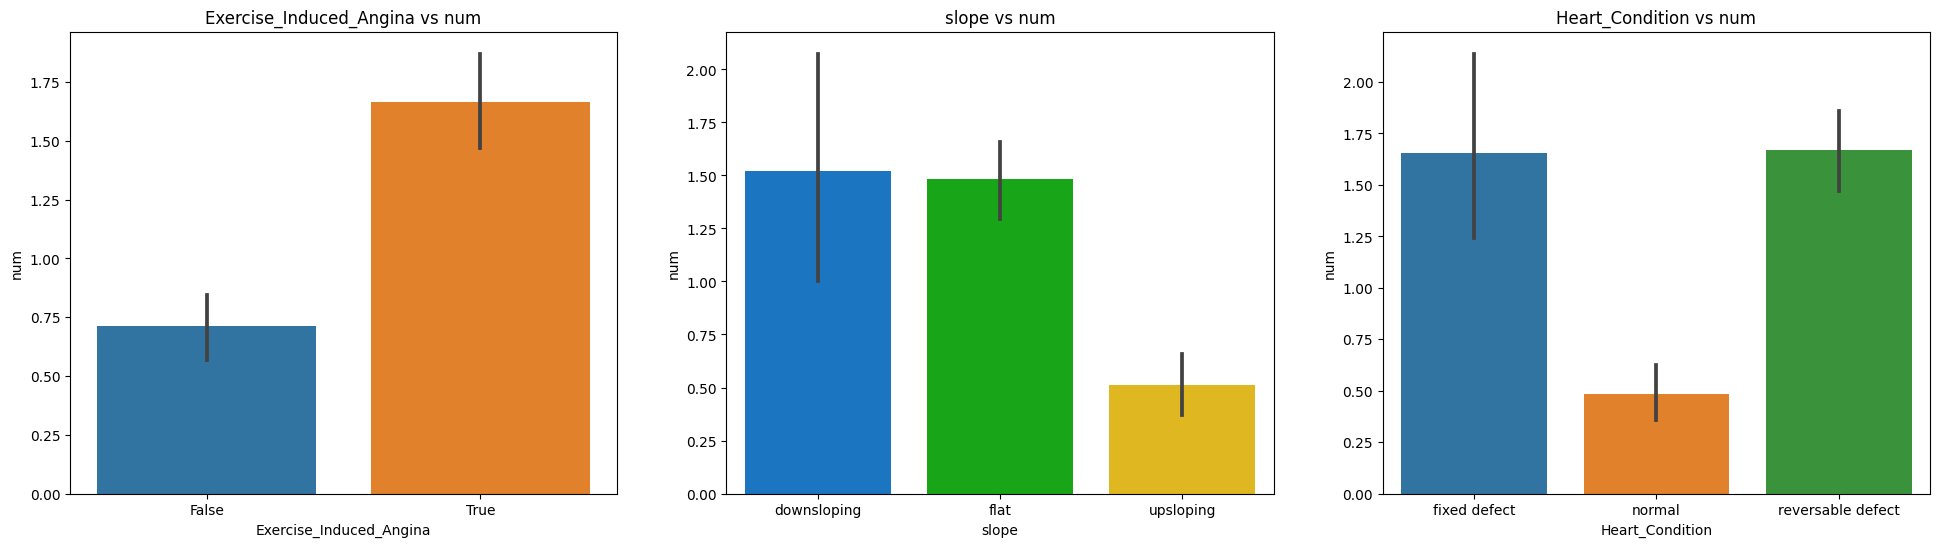

In [192]:
plt.figure(1)
plt.figure(figsize = (24, 6))

# Column (num vs Exercise_Induced_Angina)
plt.subplot(131)
sns.barplot(x = hd['Exercise_Induced_Angina'], y = hd['num'])
plt.title('Exercise_Induced_Angina vs num')

# Column (num vs slope)
plt.subplot(132)
sns.barplot(x = hd['slope'], y = hd['num'], palette = "nipy_spectral")
plt.title('slope vs num')

# Column (num vs Heart_Condition)
plt.subplot(133)
sns.barplot(x = hd['Heart_Condition'], y = hd['num'])
plt.title('Heart_Condition vs num')

plt.show()

Text(0, 0.5, 'num')

<Figure size 640x480 with 0 Axes>

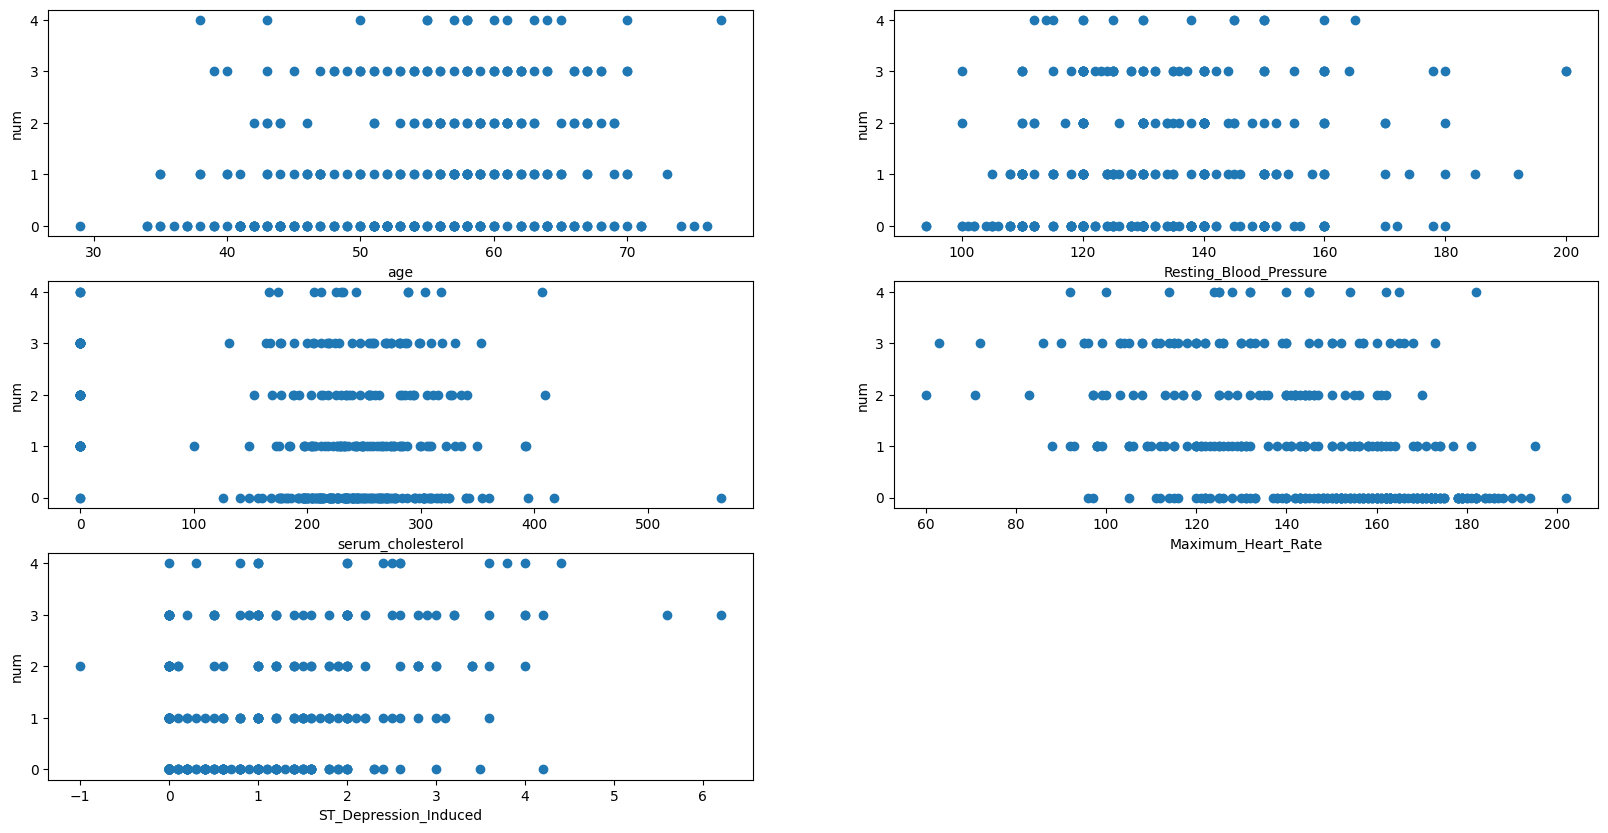

In [193]:
plt.figure(1)
plt.figure(figsize = (20, 10))

# Column (age vs num)
plt.subplot(321)
plt.ticklabel_format(style = 'plain')
plt.scatter(hd['age'], hd['num'])
plt.xlabel('age')
plt.ylabel('num')

# Column (Resting_Blood_Pressure vs num)
plt.subplot(322)
plt.ticklabel_format(style = 'plain')
plt.scatter(hd['Resting_Blood_Pressure'], hd['num'])
plt.xlabel('Resting_Blood_Pressure')
plt.ylabel('num')

# Column (serum_cholesterol vs num)
plt.subplot(323)
plt.ticklabel_format(style = 'plain')
plt.scatter(hd['serum_cholesterol'], hd['num'])
plt.xlabel('serum_cholesterol')
plt.ylabel('num')

# Column (Maximum_Heart_Rate vs num)
plt.subplot(324)
plt.ticklabel_format(style = 'plain')
plt.scatter(hd['Maximum_Heart_Rate'], hd['num'])
plt.xlabel('Maximum_Heart_Rate')
plt.ylabel('num')

# Column (ST_Depression_Induced vs num)
plt.subplot(325)
plt.ticklabel_format(style = 'plain')
plt.scatter(hd['ST_Depression_Induced'], hd['num'])
plt.xlabel('ST_Depression_Induced')
plt.ylabel('num')

#ML Models

In [ ]:
def replace_fun(column):
    l = hd[column].unique()
    for i,j in enumerate(l):
        hd[column] = hd[column].replace(j,i)

    return hd[column]

In [ ]:
replace_fun('sex')
replace_fun('Chest_Pain_Type')
replace_fun('Fasting_Blood_Sugar')
replace_fun('Resting_Electrocardiographic')
replace_fun('Exercise_Induced_Angina')
replace_fun('slope')
replace_fun('Heart_Condition')
hd.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,serum_cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic,Maximum_Heart_Rate,Exercise_Induced_Angina,ST_Depression_Induced,slope,Heart_Condition,num
0,63,0,0,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67,0,1,160.0,286.0,1,0,108.0,1,1.5,1,1,2
2,67,0,1,120.0,229.0,1,0,129.0,1,2.6,1,2,1
3,37,0,2,130.0,250.0,1,1,187.0,0,3.5,0,1,0
4,41,1,3,130.0,204.0,1,0,172.0,0,1.4,2,1,0


In [ ]:
X = hd.drop('num', axis=1)
Y = hd['num']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#KNN Model

In [ ]:
gs_knn = {'n_neighbors':[5,21,31],'weights':['uniform','distance'],'p':[1,2],'leaf_size':[10,15,40]}

In [ ]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid=gs_knn, cv=15)
knn.fit(X_train,Y_train)

GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 15, 40], 'n_neighbors': [5, 21, 31],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
knn.best_score_, knn.best_estimator_


(0.5101364522417154,
 KNeighborsClassifier(leaf_size=10, n_neighbors=21, p=1, weights='distance'))

In [ ]:
knn.score(X_train, Y_train),knn.score(X_test, Y_test)

(1.0, 0.45161290322580644)

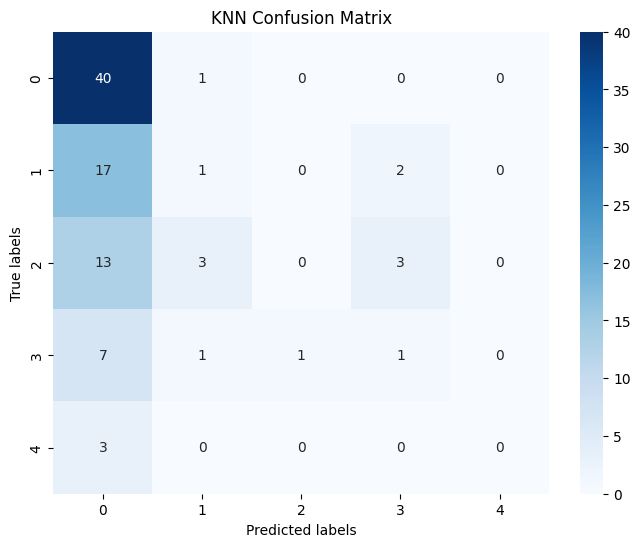

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)

Y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


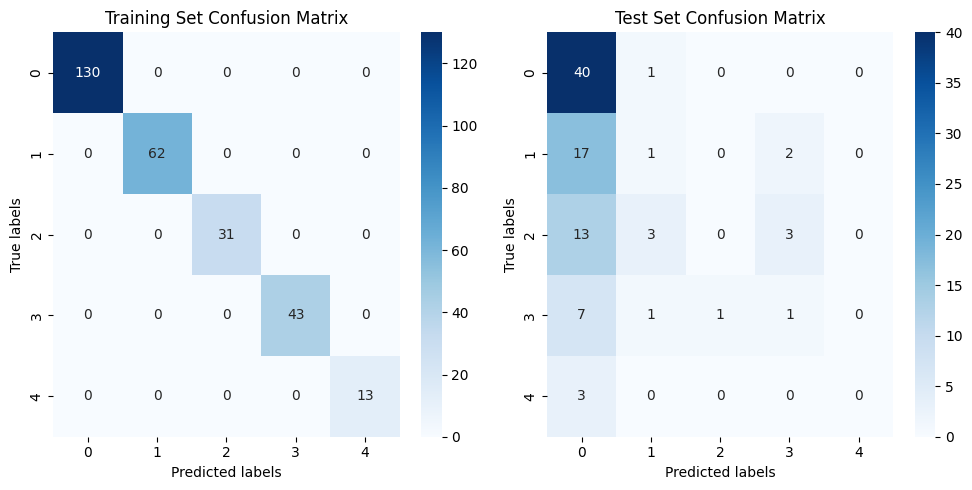

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy scores
train_score = knn.score(X_train, Y_train)
test_score = knn.score(X_test, Y_test)

# Generate confusion matrix
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)
cm_train = confusion_matrix(Y_train, Y_train_pred)
cm_test = confusion_matrix(Y_test, Y_test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Training set confusion matrix
axes[0].set_title('Training Set Confusion Matrix')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

# Test set confusion matrix
axes[1].set_title('Test Set Confusion Matrix')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

plt.tight_layout()
plt.show()


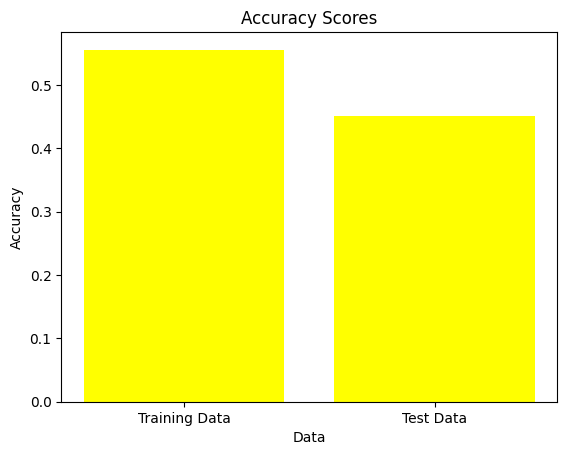

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [training_data_accuracy, test_data_accuracy]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='yellow')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()


#**SVM Model**

In [ ]:
svm = SVC(kernel = 'poly', C =1500)
svm.fit(X_train, Y_train)

SVC(C=1500, kernel='poly')

In [ ]:
svm.score(X_train,Y_train), svm.score(X_test, Y_test)

(0.6379928315412187, 0.5161290322580645)

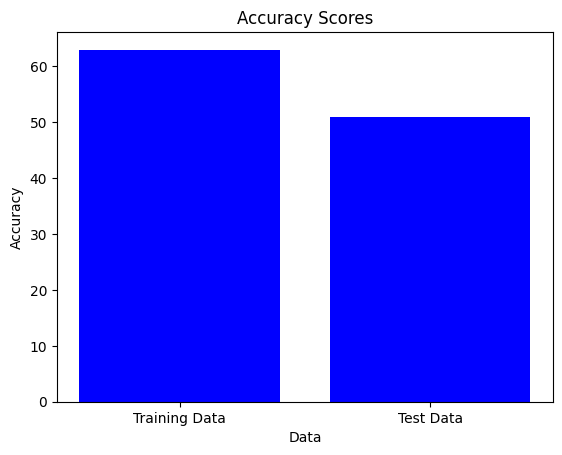

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [63, 51]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='blue')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()


#Gaussian Naive Bayes Model

In [ ]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
nb.score(X_train, Y_train), nb.score(X_test, Y_test)

(0.5842293906810035, 0.46236559139784944)

#Decision Tree with Grid Search CV

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
param_grid = {"max_depth": [5, 8, None],
              "max_features": [5, 8, 12],
              "min_samples_split": [4, 7, 10],
              "criterion": ["gini", "entropy"]}

In [ ]:
gs = GridSearchCV(dt, param_grid=param_grid, cv=20)
gs.fit(X, Y)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, None], 'max_features': [5, 8, 12],
                         'min_samples_split': [4, 7, 10]})

In [ ]:
gs.score(X_train, Y_train), gs.score(X_test, Y_test)

(0.6738351254480287, 0.6236559139784946)

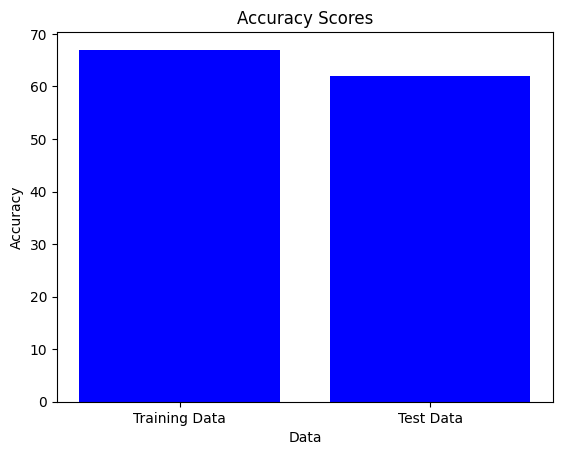

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [67,62]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='blue')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()


#Random Forest Model

In [198]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [199]:
rfc.score(X_train, Y_train),rfc.score(X_test, Y_test)

(1.0, 0.7704918032786885)

In [200]:
rfc.feature_importances_

array([0.09416488, 0.03474986, 0.1556163 , 0.06888361, 0.06788804,
       0.00719754, 0.01732073, 0.11623926, 0.05571269, 0.0945958 ,
       0.0312266 , 0.14654085, 0.10986385])

**Features are used for the building of Predictor**

In [201]:
feature_importance = pd.DataFrame({'importance': rfc.feature_importances_}, index= X.columns).sort_values('importance')
feature_importance

,importance
fbs,0.007198
restecg,0.017321
slope,0.031227
sex,0.034750
exang,0.055713
chol,0.067888
trestbps,0.068884
age,0.094165
oldpeak,0.094596
thal,0.109864


In [202]:
feature_importance[feature_importance.importance > 0.06]

,importance
chol,0.067888
trestbps,0.068884
age,0.094165
oldpeak,0.094596
thal,0.109864
thalach,0.116239
ca,0.146541
cp,0.155616


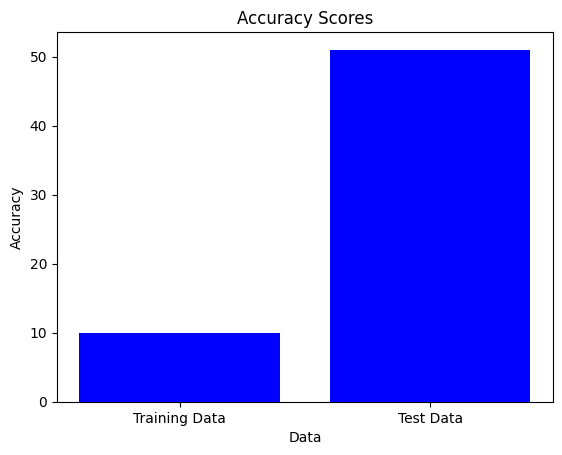

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [10.0,51]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='blue')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()

#AdaBoost Model

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X, Y)

AdaBoostClassifier()

In [ ]:
ada.score(X_train, Y_train),ada.score(X_test, Y_test)

(0.5555555555555556, 0.5806451612903226)

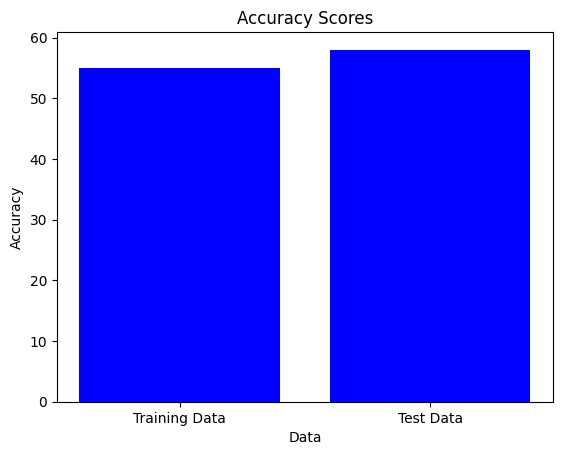

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [55,58]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='blue')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()

#Logistic Regression Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [205]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [206]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5555555555555556


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.46236559139784944


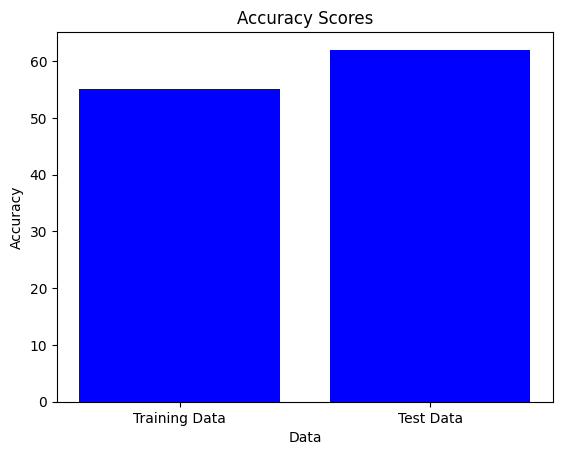

In [ ]:
import matplotlib.pyplot as plt

# Assuming training_data_accuracy and test_data_accuracy contain the accuracy scores

# Create lists of accuracy scores and corresponding labels
accuracy_scores = [55,62]
data_labels = ['Training Data', 'Test Data']

# Plotting the accuracy scores
plt.bar(data_labels, accuracy_scores, color='blue')

# Set labels and title
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')

# Display the plot
plt.show()

**Table format of all the model according to the Avg.Accuracy score**

In [ ]:
from tabulate import tabulate

# Create a list of model names
model_names = ['KNN','SVM ','Naive Bayes','Decision Tree with Grid Search CV','Random Forest','AdaBoost','LogisticRegression']

# Create a list of accuracy scores for each model
model_scores = [45,51,46,61,51,58,62]  # Replace with your actual scores

# Create a table using the model names and scores
table_data = list(zip(model_names, model_scores))

# Set the table headers
headers = ["Model", "Accuracy Score"]

# Display the table
print(tabulate(table_data, headers, tablefmt="fancy_grid"))


╒═══════════════════════════════════╤══════════════════╕
│ Model                             │   Accuracy Score │
╞═══════════════════════════════════╪══════════════════╡
│ KNN                               │               45 │
├───────────────────────────────────┼──────────────────┤
│ SVM                               │               51 │
├───────────────────────────────────┼──────────────────┤
│ Naive Bayes                       │               46 │
├───────────────────────────────────┼──────────────────┤
│ Decision Tree with Grid Search CV │               61 │
├───────────────────────────────────┼──────────────────┤
│ Random Forest                     │               51 │
├───────────────────────────────────┼──────────────────┤
│ AdaBoost                          │               58 │
├───────────────────────────────────┼──────────────────┤
│ LogisticRegression                │               62 │
╘═══════════════════════════════════╧══════════════════╛


#**Building a Predictive System**

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,5,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease 💛💛💛')
else:
  print('The Person has Heart Disease  💔💔💔')

[0]
The Person does not have a Heart Disease 💛💛💛
